# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&units=' + units + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | diu
Processing Record 3 of Set 1 | marka
Processing Record 4 of Set 1 | anabar
City not found. Skipping...
Processing Record 5 of Set 1 | muroto-misakicho
Processing Record 6 of Set 1 | la paz
Processing Record 7 of Set 1 | puerto leguizamo
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | taunsa
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | san jose village
City not found. Skipping...
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | mili
Processing Record 17 of Set 1 | satkania
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | atar
Processing Record 20 of Set 1 | kingscliff
Processing Record 21 of Set 1 | zheshart
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,20.91,81,20,3.60,US,1707887472
1,diu,20.7141,70.9822,26.82,21,2,4.42,IN,1707887473
2,marka,1.7159,44.7717,27.03,80,32,6.26,SO,1707887474
3,muroto-misakicho,33.2833,134.1500,15.89,68,100,1.60,JP,1707887476
4,la paz,-16.5000,-68.1500,9.21,83,99,1.34,BO,1707887477


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.91,81,20,3.60,US,1707887472
1,diu,20.7141,70.9822,26.82,21,2,4.42,IN,1707887473
2,marka,1.7159,44.7717,27.03,80,32,6.26,SO,1707887474
3,muroto-misakicho,33.2833,134.1500,15.89,68,100,1.60,JP,1707887476
4,la paz,-16.5000,-68.1500,9.21,83,99,1.34,BO,1707887477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

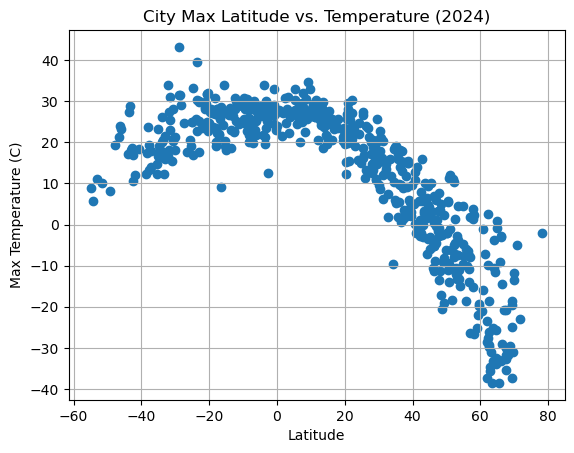

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Temperature (2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
            
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

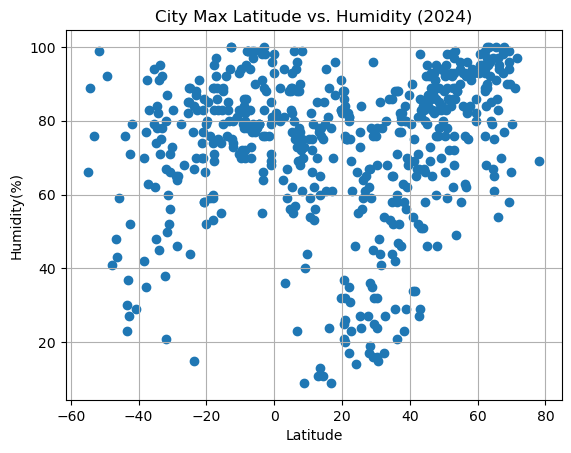

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Humidity (2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

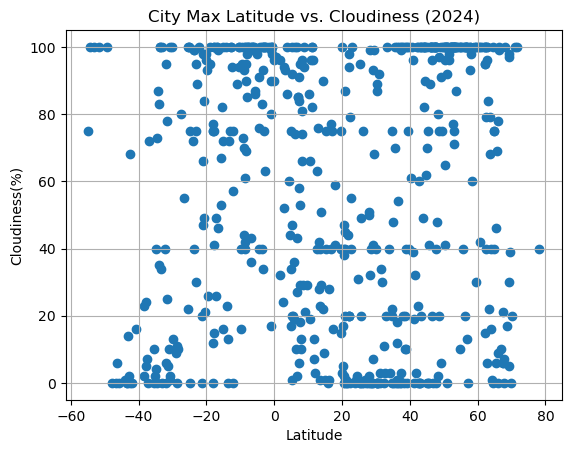

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Cloudiness (2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

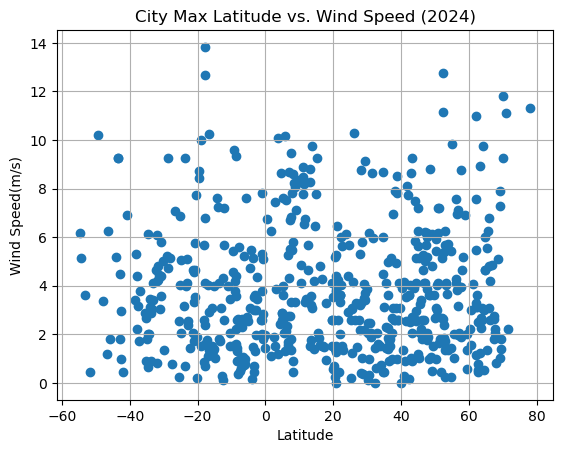

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Wind Speed (2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    # Perform linear regression to calculate slope, intercept, r-value, p-value, and standard error
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    # Calculate the predicted values using the linear regression equation
    regress_values = x_values * slope + intercept
    # Create the equation of the regression line
    equation = "y = " + str(round(slope,2))+ "x + " + str(round(intercept,2))
    
    # Scatter plot of the actual data points
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the regression line at the specified position
    plt.annotate(equation, (min(x_values),max(y_values)), fontsize = 15, color='red')
    
    # Set X/Y-axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.91,81,20,3.60,US,1707887472
1,diu,20.7141,70.9822,26.82,21,2,4.42,IN,1707887473
2,marka,1.7159,44.7717,27.03,80,32,6.26,SO,1707887474
3,muroto-misakicho,33.2833,134.1500,15.89,68,100,1.60,JP,1707887476
8,taunsa,30.7048,70.6505,21.17,15,0,0.33,PK,1707887303


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,la paz,-16.5000,-68.1500,9.21,83,99,1.34,BO,1707887477
5,puerto leguizamo,-0.1934,-74.7819,22.91,98,96,1.98,CO,1707887478
6,port-aux-francais,-49.3500,70.2167,8.26,92,100,10.20,TF,1707887478
7,grytviken,-54.2811,-36.5092,5.72,89,100,5.16,GS,1707887479
10,ushuaia,-54.8000,-68.3000,8.81,66,75,6.17,AR,1707887305


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.9042589117092049


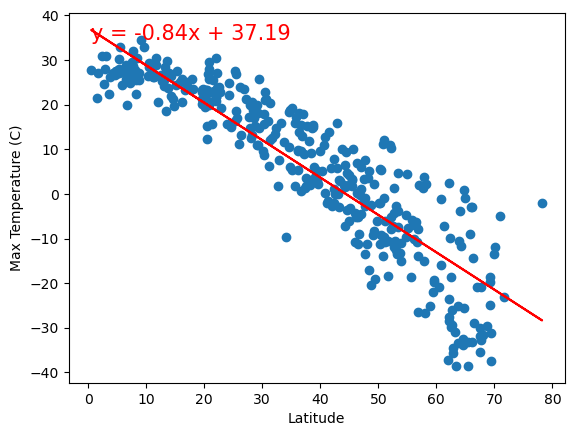

In [69]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print r-value
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (C)')


The r-value is : 0.5116940936832073


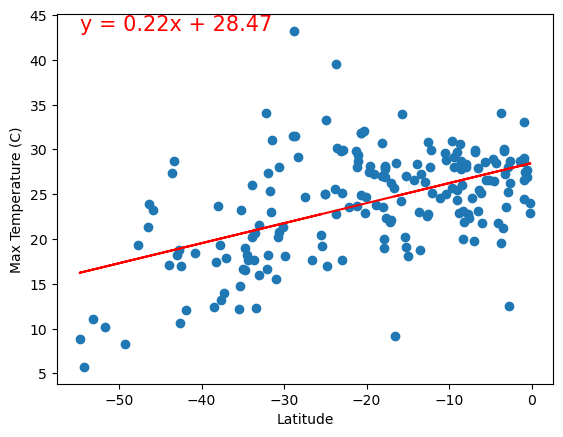

In [61]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (C)')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Northern Hemisphere, according to the slope (-0.84), latitude shows a negative correlation with maximum temperature. Hence, as latitude increases (moving away from the equator), the maximum temperature tends to decrease.

In Southern Hemisphere, according to the slope(0.22), latitude shows a positive correlation with maxium temperature. Hence, the temperatures tend to increase as latitude increases (away from the equator).

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.3386215407794285


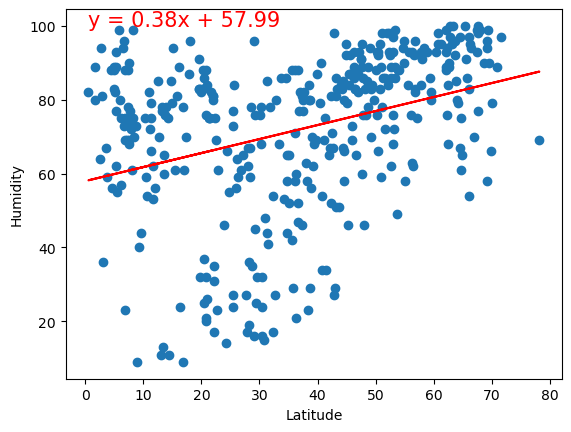

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity')

The r-value is : 0.43080148088731174


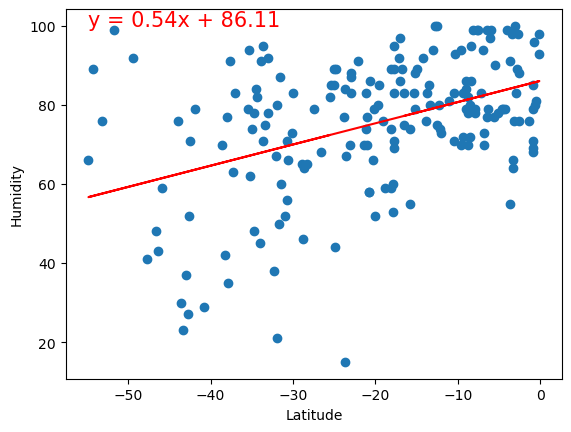

In [63]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Northern Hemisphere, according to the slope (0.38), latitude shows a positive correlation with Humidity. Hence, as latitude increases (moving away from the equator), the humidity tends to increase.

In Southern Hemisphere, according to the slope (0.54), latitude shows a positive correlation with Humidity. Hence, as latitude increases (moving away from the equator), the humidity tends to increase.

Certainly, the strength of correlation between humidity and latitude in Southern Hemisphere is stronger than northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.20061903948271045


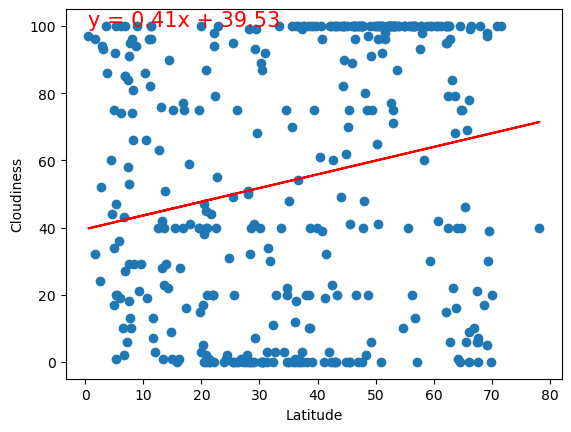

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness')

The r-value is : 0.4661361090890392


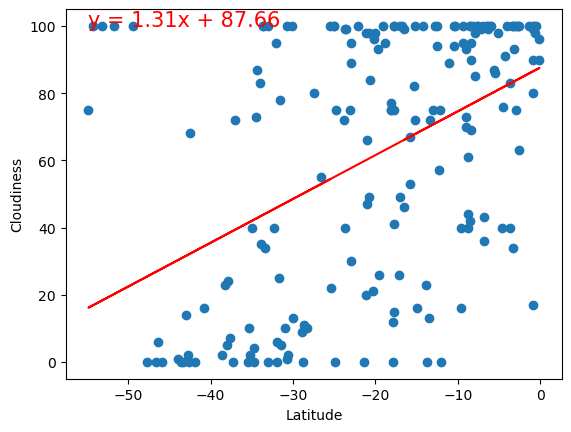

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In Northern Hemisphere, according to the slope (0.41), latitude shows a positive correlation with Cloudiness. Hence, as latitude increases (moving away from the equator), the Cloudiness tends to increase.

In Southern Hemisphere, according to the slope (1.31), latitude shows a positive correlation with Cloudiness. Hence, as latitude increases (moving away from the equator), the Cloudiness tends to increase.

Hence, the correlation in Southern Hemisphere is stronger.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.031176310815672324


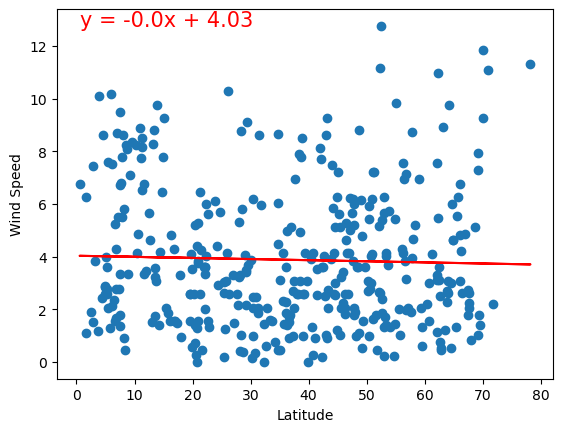

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed')

The r-value is : -0.1370617991010552


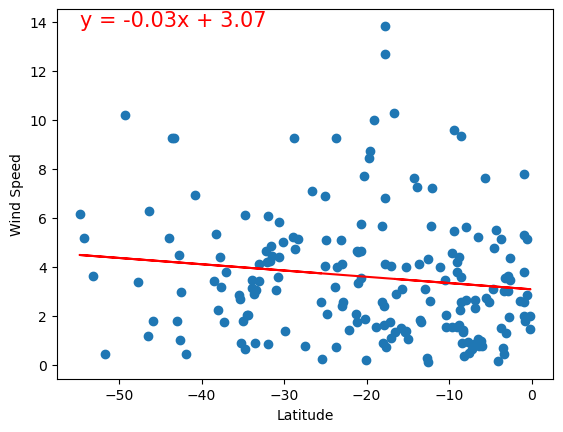

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Print the rvalue
print(f'The r-value is : {r_value}')

# Call the plot_linear_regression function to create the regression plot
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the Northern Hemisphere, the wind speed has negative relationshp with latitude due to the slope -0.0, this means that wind speeds may decrease slightly with increasing latitude (away from the equator), although the slope of this is close to zero, indicating a very weak relationship.

In Southern Hemisphere, it is also negative relationship, the relationshio is weak.wind speeds may decrease slightly with increasing latitude 

Hence, the wind speed only has slightly realtionship with latitude.